# Aula 15 - Regressão Linear

<center>
<img src="./images/learning.png" alt="drawing" width="700px"></center>

**Intrutora:** Patrícia Pampanelli (@patriciapampanelli no Slack)

**Experiência:**
- Cientista da Computação (UFJF)
- Mestre em Modelagem Computacional (UFJF)
- Doutora em Processamento de Imagens e Visão Computacional (PUC-Rio)
- Sênior Data Scientist - Grupo ZAP

# Aprendizado?! O que é?

<center>
<img src="./images/learning-quotes.png" alt="drawing" width="400px"></center>

# Aprendizado Supervisionado e Não-supervisionado

<center>
<img src="./images/supervised_unsupervised.png" alt="drawing" width="500px"></center>

# Case - Predição de Valores de Imóveis

<center>
<img src="./images/house.jpg" alt="drawing" width="500px"></center>

# Case - Predição de Valores de Imóveis

- Dataset da cidade de Boston
- Disponível no sklearn
- Informações do dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

<center>
<img src="./images/boston-rent.jpg" alt="drawing" width="500px"></center>

# O que é regressão linear?

<center>
<img src="./images/regression.gif" alt="drawing" width="500px"></center>

# Vídeo

<center>
<video controls src="./videos/linear-regression.mp4" size=2/></center>
Link: https://www.youtube.com/watch?v=iIUq0SqBSH0

# Carregando o dataset

In [1]:
# Carregando o dataset a partir do sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# Quais as chaves do dicionário?

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

# Quais os nomes das features?

In [3]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Quais as descrições das features?

In [4]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Exercício 1 - Análise exploratória

Neste exercício vamos transformar o dicionário carregado em um *pd.Dataframe* e fazer uma análise exploratória.

**Objetivos:**
- Transformar o dicionário (*boston*) em um *pd.Dataframe*
- Plotar 

- [Documentação](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html): **pandas.DataFrame**

*Tempo: 15 minutos*

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Criar um dicionário a partir de um dataframe
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)

# TODO: Incluir a variável de resposta (target) no dataframe
boston_data['target'] = boston.target

# TODO: Verificar o número de linhas do dataframe
print('Tamanho do dataframe: {}'.format(len(boston_data)))

# TODO: Verificar o número de features
print('Número de features: {}'.format(len(boston_data.columns)))

# TODO: Plotar os primeiras 10 elementos do dataframe
print(boston_data.head)

# TODO: Plotar um histograma com as frequências da variável de resposta



Tamanho do dataframe: 506
Número de features: 14
<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  

# Regressão linear simples

Vamos construir uma primeira regressão linear escolhendo uma variábel que julgamos ser a mais relevante.

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- **RM: average number of rooms per dwelling**
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: \% lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

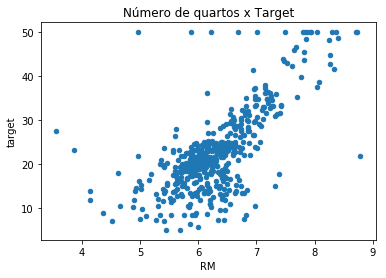

In [13]:
# Variável target x variável com o número de quartos
_ = boston_data.plot.scatter(x='RM', y='target')
_ = plt.title('Número de quartos x Target')

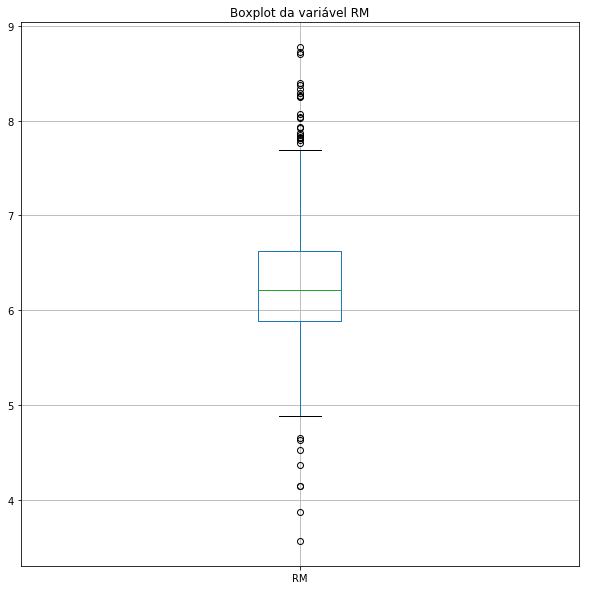

In [14]:
# Boxplot com a distribuição da variável RM
plt.figure(figsize=(10, 10))
_ = boston_data.boxplot(column=['RM'])
_ = plt.title('Boxplot da variável RM')

# Correlação

#### Dúvidas?

<center>
<img src="./images/correlation.png" alt="drawing" width="500px"></center>

# Medir a correlação entre 'RM' e 'Target'

Calculando a correlação de Pearson entre as variáveis 'RM' e 'Target' usando a função *corr* do Pandas:

In [15]:
boston_data.target.corr(boston_data.RM)

0.695359947071539

# Separando os dados entre treinamento e teste da regressão linear

In [16]:
from sklearn.model_selection import train_test_split

# Variável alvo
Y = boston_data['target']
# Dados de treinamento
X = boston_data.RM.to_frame()
# Separando os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

# Calculando a regressão linear com estes dados

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

# Verificando os resultados desta regressão linear

Podemos interpretar que, pela inclinação da curva, o aumento de um 1 quarto no imóvel acarreta em um aumento de 9.11 no preço do imóvel.

[9.1181022]
-34.662307438406785


/home/cintia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


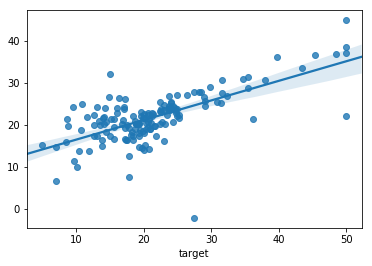

In [18]:
import seaborn as sns

_ = sns.regplot(x=Y_test, y=Y_pred)

beta1=lm.coef_
intercepto=lm.intercept_
print(beta1)
print(intercepto)

# Medindo o erro desta regressão linear

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(mse)

40.35144969787305


# Verificando o resultado nos dados de teste

In [20]:
print("Número de quarto: {}".format(X_test.iloc[0]))
print("\nValor do imóvel: {:.2f}".format(Y_pred[0]))

Número de quarto: RM    6.416
Name: 173, dtype: float64

Valor do imóvel: 23.84


# Olhando para a equação da reta

Substituindo os valores anteriores na equação da reta temos o mesmo resultado!

<center>
<img src="./images/exclamation.png" alt="drawing" width="300px"></center>

In [21]:
intercepto + (beta1[0] * X_test.iloc[0][0])

23.839436259494313

# Medindo o erro da solução - Erro médio quadrático

Quanto menor o erro médio quadrático, melhor o resultado obtido pela regressão linear:

<center>
<img src="./images/mean-squared-error.svg" alt="drawing" width="300px"></center>

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(mse)

40.35144969787305


# Exercício 2 - Regressão linear simples

Neste exercício vamos fazer uma nova regressão linear utilizando a variável LSTAT (lower status of the population)

**Objetivos**:

- Plotar o histograma da variável LSTAT
- Plotar o boxplot da variável LSTAT
- Plotar um gráfico comparando a variável LSTAT com o Target 
- Implementar a regressão linear utilizando esta variável
- Avaliar o erro médio quadrático
- Escrever um parágrafo dizendo qual das duas variáveis (RM ou LSTAT) tem o melhor resultado e por que.

Documentação: pandas.DataFrame

*Tempo: 20 minutos*

# Regressão linear multivariada

<center>
<video controls src="./videos/multivariable-linear-regression.mp4" size=2/></center>
Link: https://www.youtube.com/watch?v=_cySxn5134c&t=20s

# Matriz de correlação entre as variáveis:

- **RM**: average number of rooms per dwelling
- **PTRATIO**: pupil-teacher ratio by town
- **LSTAT**: % lower status of the population

               RM     LSTAT   PTRATIO       AGE    target
RM       1.000000 -0.613808 -0.355501 -0.240265  0.695360
LSTAT   -0.613808  1.000000  0.374044  0.602339 -0.737663
PTRATIO -0.355501  0.374044  1.000000  0.261515 -0.507787
AGE     -0.240265  0.602339  0.261515  1.000000 -0.376955
target   0.695360 -0.737663 -0.507787 -0.376955  1.000000


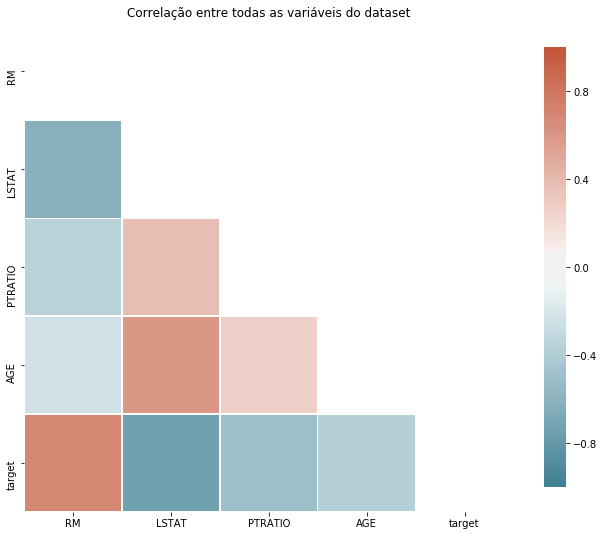

In [156]:
cols = ['RM', 'LSTAT', 'PTRATIO', 'AGE', 'target']
print(boston_data[cols].corr())

# Generate a mask for the upper triangle
corr = boston_data[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlação entre todas as variáveis do dataset')
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .9})

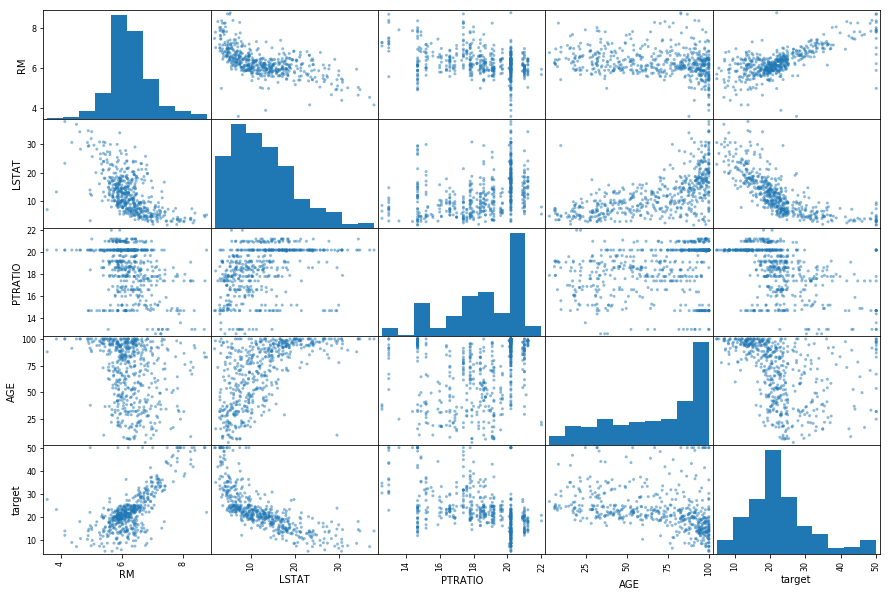

In [157]:
from pandas.plotting import scatter_matrix

cols = ['RM', 'LSTAT', 'PTRATIO', 'AGE', 'target']
scatter_matrix(boston_data[cols], figsize=(15, 10))
plt.show()

# Exercício 3 - Regressão linear multivariada

O objetivo deste exercício é calcular regressão linear utilizando as variáveis:

- **RM**: average number of rooms per dwelling
- **PTRATIO**: pupil-teacher ratio by town
- **LSTAT**: % lower status of the population
- **DIS**: weighted distances to five Boston employment centres

***Tip:*** *observe o resultado do Exercício 2!*

*Tempo: 20 minutos*

# Medindo a correlação entre todas as variáveis

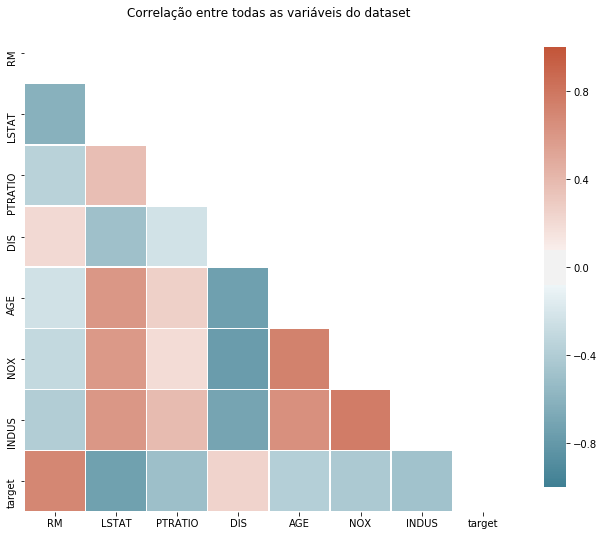

In [164]:
import numpy as np

cols = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'AGE', 'NOX', 'INDUS', 'target']

# Generate a mask for the upper triangle
corr = boston_data[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlação entre todas as variáveis do dataset')
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .9})

# Multicolinearidade

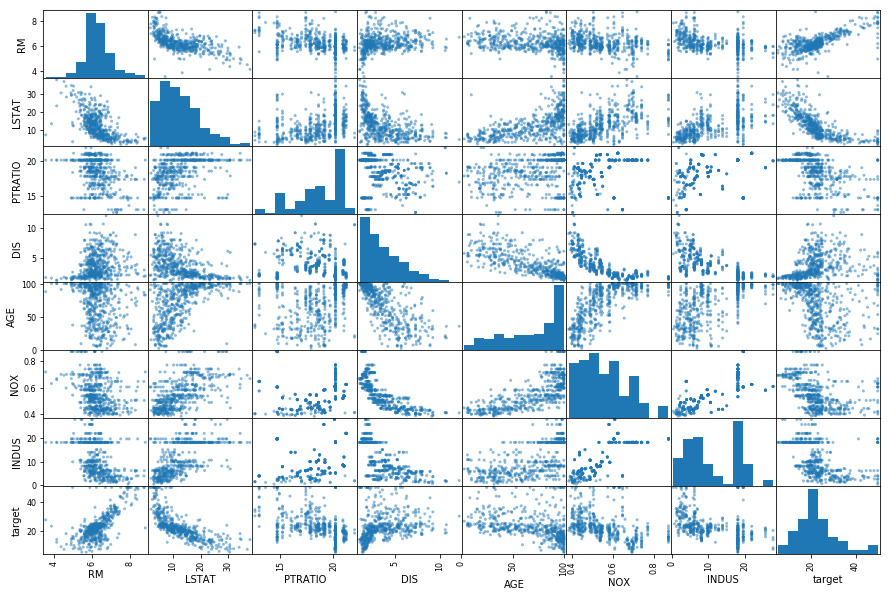

In [163]:
from pandas.plotting import scatter_matrix

cols = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'AGE', 'NOX', 'INDUS', 'target']
scatter_matrix(boston_data[cols], figsize=(15, 10))
plt.show()

# Exercício 4 - Regressão linear multivariada

O objetivo deste exercício é calcular regressão linear todas as variáveis, removendo somente as variáveis identificadas anteriormente como altamente correlacionadas ('AGE', 'NOX', 'INDUS')

- Calcule a regressão linear
- Analise os resultados. Melhorou? Piorou?

***Tips:*** 
- *observe o resultado do Exercício 3!*
- *lembrem-se da função [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)*

*Tempo: 10 minutos*